# Importing Libraries

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

# EDA and Preprocessing

## Read Data

In [2]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

## Get first and last samples

In [4]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [5]:
df.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


## Get data information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## **Age column**

In [7]:
# Statistical summary
df['Age'].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

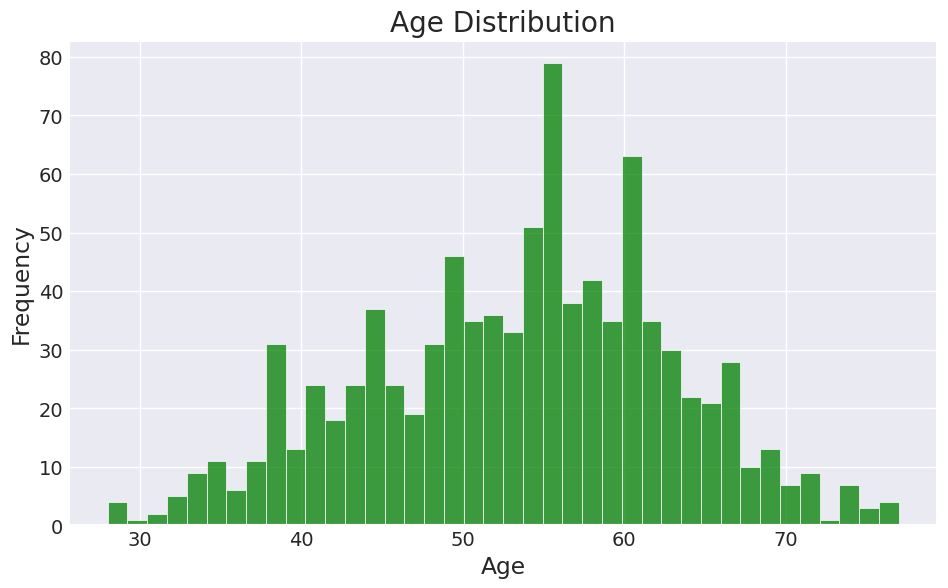

In [15]:
# Show age distribution
plt.figure(figsize=(10, 6))

sns.histplot(df['Age'], bins=40, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## **Sex Column**

In [16]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [17]:
# Encode Sex column 
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])

In [18]:
df['Sex'].value_counts()

Sex
1    725
0    193
Name: count, dtype: int64

## **ChestPainType Column**

In [19]:
ChestPainType = df['ChestPainType'].value_counts()
ChestPainType

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

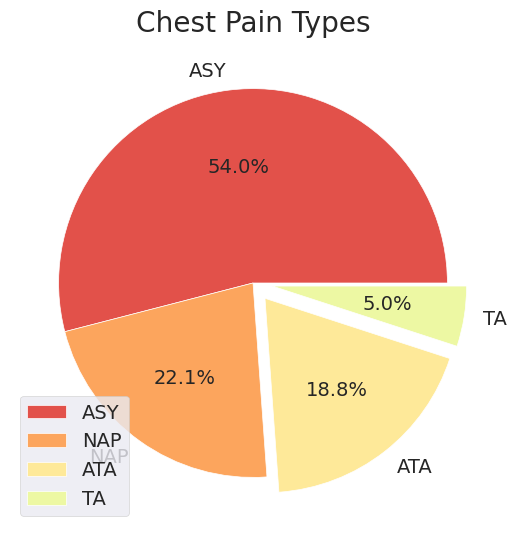

In [35]:
plt.figure(figsize=(6, 6))
plt.pie(ChestPainType, labels=['ASY', 'NAP', 'ATA', 'TA'],
                        autopct='%1.1f%%', shadow=False,
                        explode=[0.0, 0.0, 0.1, 0.1], colors=sns.color_palette('Spectral'))
plt.title('Chest Pain Types')
plt.legend()
plt.show()

In [36]:
# Encode ChestPainType column
df['ChestPainType'] = encoder.fit_transform(df['ChestPainType'])

In [37]:
df['ChestPainType'].value_counts()

ChestPainType
0    496
2    203
1    173
3     46
Name: count, dtype: int64

## **RestingBP Column**

In [38]:
df['RestingBP'].describe()

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: RestingBP, dtype: float64

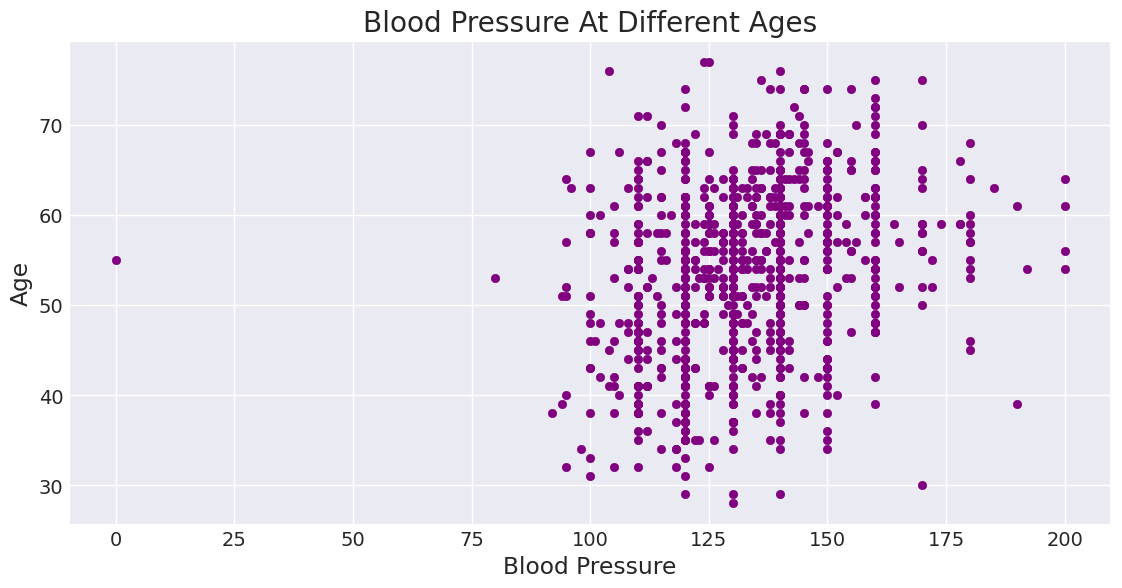

In [44]:
# Show Blood Pressure At Different Ages
plt.figure(figsize=(12, 6))
plt.scatter(df['RestingBP'], df['Age'], color='purple')
plt.title('Blood Pressure At Different Ages')
plt.xlabel('Blood Pressure')
plt.ylabel('Age')
plt.show()

In [42]:
df[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,1,2,0,0,0,Normal,155,N,1.5,Flat,1


In [45]:
df.drop(index=449, inplace=True)

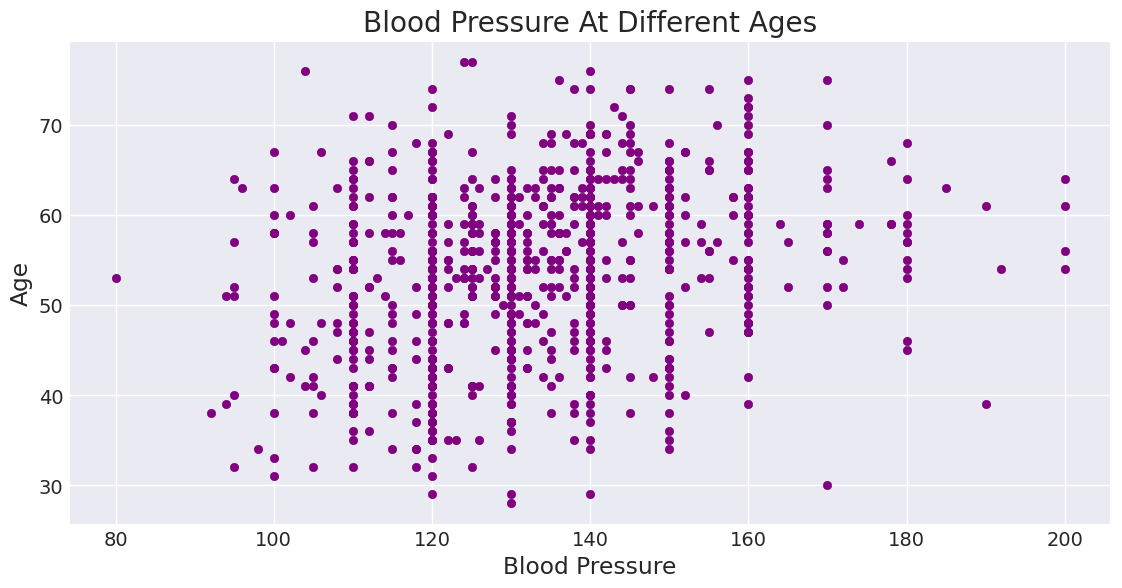

In [46]:
# Show Blood Pressure At Different Ages
plt.figure(figsize=(12, 6))
plt.scatter(df['RestingBP'], df['Age'], color='purple')
plt.title('Blood Pressure At Different Ages')
plt.xlabel('Blood Pressure')
plt.ylabel('Age')
plt.show()

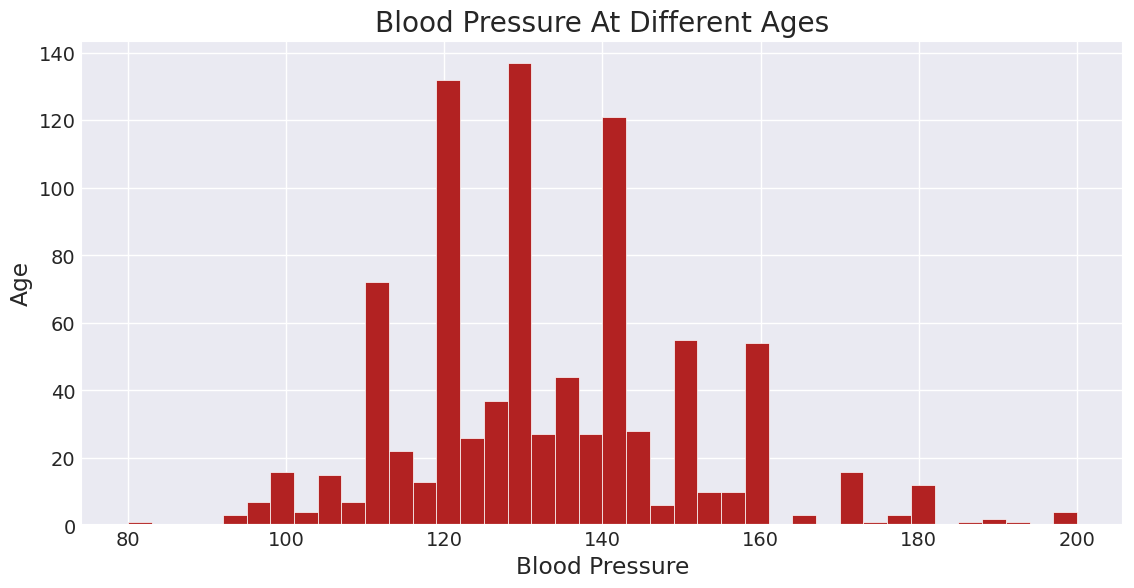

In [56]:
# Show Blood Pressure At Different Ages
plt.figure(figsize=(12, 6))
plt.hist(df['RestingBP'], bins=40, color='firebrick')
plt.title('Blood Pressure At Different Ages')
plt.xlabel('Blood Pressure')
plt.ylabel('Age')
plt.show()

## **Cholesterol Column**

#### - Normal: Less than 200 mg/dL. Borderline high: 200 to 239 mg/dL. High: At or above 240 mg/dL
#### - Sometimes the cholesterol value can reach 600, but in this case, you need immediate treatment.

In [57]:
df['Cholesterol'].describe()

count    917.000000
mean     199.016358
std      109.246330
min        0.000000
25%      174.000000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64

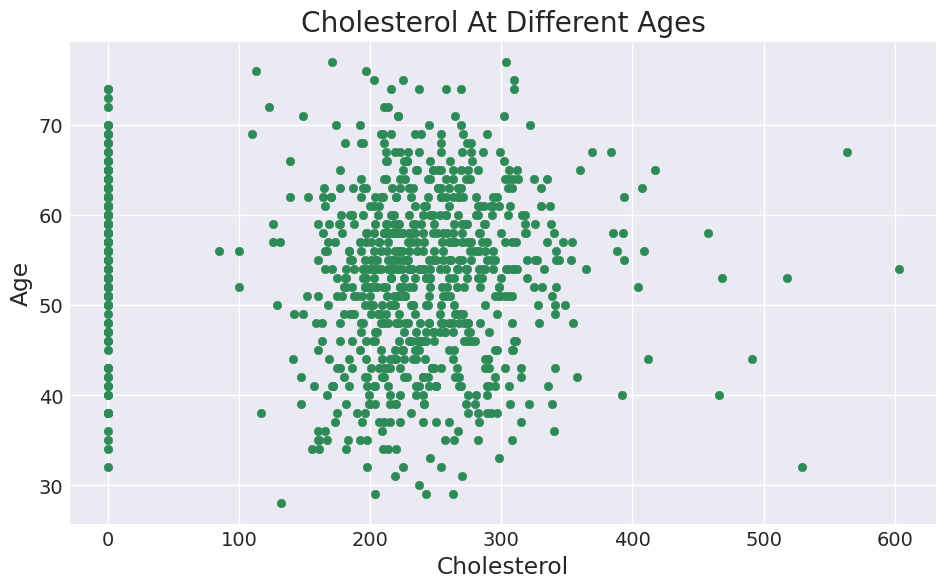

In [59]:
# Show Serum Cholesterol At Different Ages
plt.figure(figsize=(10, 6))
plt.scatter(df['Cholesterol'], df['Age'], color='seagreen')
plt.title('Cholesterol At Different Ages')
plt.xlabel('Cholesterol')
plt.ylabel('Age')
plt.show()

In [60]:
df[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,1,0,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,1,3,95,0,1,Normal,127,N,0.7,Up,1
295,61,1,0,105,0,1,Normal,110,Y,1.5,Up,1
296,50,1,0,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,1,0,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,1,0,122,0,0,Normal,120,N,0.5,Up,1
515,63,1,2,130,0,1,ST,160,N,3.0,Flat,0
518,48,1,2,102,0,1,ST,110,Y,1.0,Down,1
535,56,1,0,130,0,0,LVH,122,Y,1.0,Flat,1


In [61]:
df[df['Cholesterol'] == 0]['Cholesterol']

293    0
294    0
295    0
296    0
297    0
      ..
514    0
515    0
518    0
535    0
536    0
Name: Cholesterol, Length: 171, dtype: int64

In [62]:
df[df['Cholesterol'] == 0]['Cholesterol'].count()

171

In [63]:
# Observations which have 0
df[df['Cholesterol'] == 0]['Cholesterol'].index

Index([293, 294, 295, 296, 297, 298, 299, 300, 301, 302,
       ...
       481, 483, 484, 492, 508, 514, 515, 518, 535, 536],
      dtype='int64', length=171)

In [64]:
index = list(df[df['Cholesterol'] == 0]['Cholesterol'].index)
index

[293,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 411,
 412,
 413,
 414,
 415,
 421,
 423,
 424,
 427,
 428,
 429,
 430,
 434,
 435,
 436,
 437,
 438,
 439,
 440,
 441,
 442,
 446,
 450,
 451,
 453,
 455,
 456,
 457,
 458,
 459,
 461,
 463,
 464,
 466,
 467,
 470,
 471,
 472,
 474,
 475,
 477,
 479,
 480,
 481,
 483,
 484,
 492,
 508,
 514

In [65]:
df.drop(index= index, inplace=True)

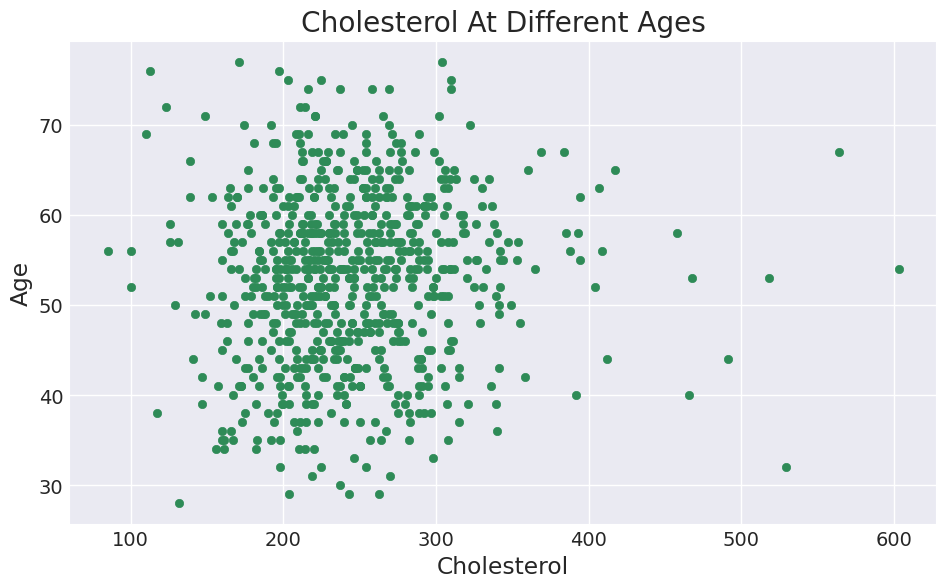

In [66]:
# Show Serum Cholesterol At Different Ages
plt.figure(figsize=(10, 6))
plt.scatter(df['Cholesterol'], df['Age'], color='seagreen')
plt.title('Cholesterol At Different Ages')
plt.xlabel('Cholesterol')
plt.ylabel('Age')
plt.show()

In [67]:
# Observation which have cholestrol more value than 400
df[df['Cholesterol'] >= 400]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
28,53,0,1,113,468,0,Normal,127,N,0.0,Up,0
30,53,1,2,145,518,0,Normal,130,N,0.0,Flat,1
69,44,1,0,150,412,0,Normal,170,N,0.0,Up,0
76,32,1,0,118,529,0,Normal,130,N,0.0,Flat,1
103,40,1,0,120,466,1,Normal,152,Y,1.0,Flat,1
149,54,1,0,130,603,1,Normal,125,Y,1.0,Flat,1
182,52,1,0,140,404,0,Normal,124,Y,2.0,Flat,1
250,44,1,0,135,491,0,Normal,135,N,0.0,Flat,1
496,58,1,0,132,458,1,Normal,69,N,1.0,Down,0
616,67,0,2,115,564,0,LVH,160,N,1.6,Flat,0


In [74]:
# Observation which have cholestrol more value than 400
df[(df['Cholesterol'] >= 400) & (df['HeartDisease']==1)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
30,53,1,2,145,518,0,Normal,130,N,0.0,Flat,1
76,32,1,0,118,529,0,Normal,130,N,0.0,Flat,1
103,40,1,0,120,466,1,Normal,152,Y,1.0,Flat,1
149,54,1,0,130,603,1,Normal,125,Y,1.0,Flat,1
182,52,1,0,140,404,0,Normal,124,Y,2.0,Flat,1
250,44,1,0,135,491,0,Normal,135,N,0.0,Flat,1
624,63,0,0,150,407,0,LVH,154,N,4.0,Flat,1
796,56,0,0,134,409,0,LVH,150,Y,1.9,Flat,1


## **FastingBS**

In [75]:
df['FastingBS'].value_counts()

FastingBS
0    621
1    125
Name: count, dtype: int64

## **RestingECG**

In [78]:
RestingECG = df['RestingECG'].value_counts()
RestingECG

RestingECG
Normal    445
LVH       176
ST        125
Name: count, dtype: int64

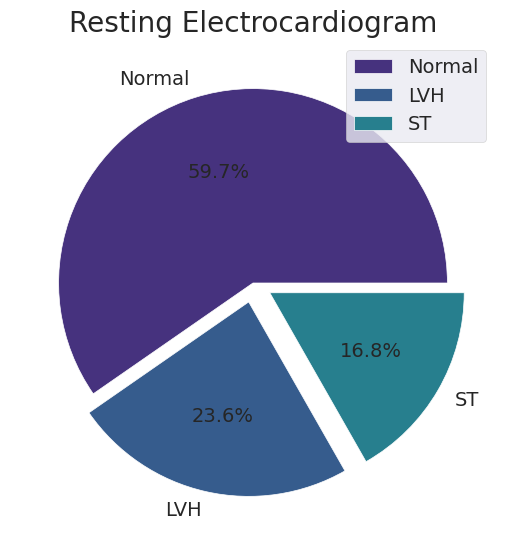

In [99]:
# Show resting electrocardiogram
plt.figure(figsize=(6, 6))
plt.pie(RestingECG, labels=['Normal', 'LVH', 'ST'],
                    autopct='%1.1f%%', shadow=False,
                    explode=[0.0, 0.1, 0.1], colors=sns.mpl_palette("viridis"))
plt.title('Resting Electrocardiogram')
plt.legend()
plt.show()

In [100]:
# Encode RestingECG column
df['RestingECG'] = encoder.fit_transform(df['RestingECG'])

In [101]:
df['RestingECG'].value_counts()

RestingECG
1    445
0    176
2    125
Name: count, dtype: int64

## **MaxHR**

In [102]:
df['MaxHR'].describe()

count    746.000000
mean     140.226542
std       24.524107
min       69.000000
25%      122.000000
50%      140.000000
75%      160.000000
max      202.000000
Name: MaxHR, dtype: float64

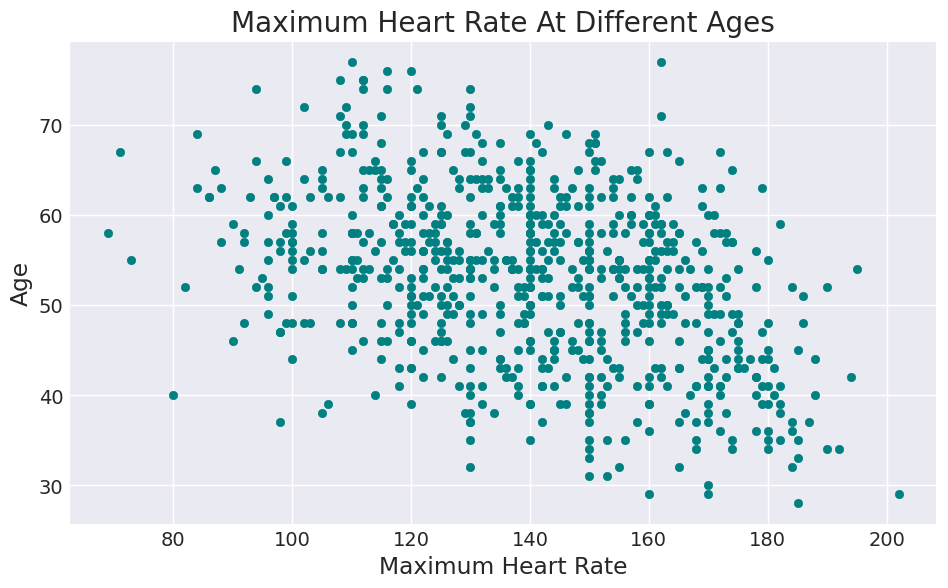

In [103]:
# Show Maximum Heart Rate At Different Ages
plt.figure(figsize=(10, 6))
plt.scatter(df['MaxHR'], df['Age'], color='teal')
plt.title('Maximum Heart Rate At Different Ages')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Age')
plt.show()

## **ExerciseAngina**

In [104]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
N    459
Y    287
Name: count, dtype: int64

In [105]:
# Encode ExerciseAngina column
df['ExerciseAngina'] = encoder.fit_transform(df['ExerciseAngina'])

In [106]:
df['ExerciseAngina'].value_counts()

ExerciseAngina
0    459
1    287
Name: count, dtype: int64

## **Oldpeak**

In [107]:
df['Oldpeak'].describe()

count    746.000000
mean       0.901609
std        1.072861
min       -0.100000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64

## **ST_Slope**

In [109]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    354
Up      349
Down     43
Name: count, dtype: int64

In [110]:
# Encode ST_Slope column
df['ST_Slope'] = encoder.fit_transform(df['ST_Slope'])

In [111]:
df['ST_Slope'].value_counts()

ST_Slope
1    354
2    349
0     43
Name: count, dtype: int64

# Machine Learning Model

## Spliting Data into X & y

In [119]:
# Divide data into dependent and independent
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [120]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [121]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 746, dtype: int64

## Data Scaling

In [123]:
# Scaling Model
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [124]:
X

array([[-1.35607325,  0.56806253,  0.1665881 , ..., -0.79074163,
        -0.84094155,  0.9868448 ],
       [-0.40865641, -1.76036959,  1.21091347, ..., -0.79074163,
         0.0917709 , -0.6863057 ],
       [-1.67187886,  0.56806253,  0.1665881 , ..., -0.79074163,
        -0.84094155,  0.9868448 ],
       ...,
       [ 0.43349189,  0.56806253, -0.87773728, ...,  1.26463557,
         0.27831339, -0.6863057 ],
       [ 0.43349189, -1.76036959,  0.1665881 , ..., -0.79074163,
        -0.84094155, -0.6863057 ],
       [-1.56661032,  0.56806253,  1.21091347, ..., -0.79074163,
        -0.84094155,  0.9868448 ]])

## Spliting Data into Train & Test

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)

In [132]:
y_train

737    1
59     1
445    1
817    1
195    0
      ..
98     0
487    1
554    0
537    1
682    1
Name: HeartDisease, Length: 596, dtype: int64

## Logistic Regression

In [164]:
# Logistic Regression Model
LogisticRegressionModel = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100)
LogisticRegressionModel.fit(X_train, y_train)

LogisticRegression()

In [165]:
# Score of model
print('Score of train data = ', round(LogisticRegressionModel.score(X_train, y_train), 4))
print('Score of test data = ', round(LogisticRegressionModel.score(X_test, y_test), 4))

Score of train data =  0.8574
Score of test data =  0.8467


## SVC

In [154]:
# SVC Model
SVCModel = SVC(C=2, kernel='rbf')
SVCModel.fit(X_train, y_train)

SVC(C=2)

In [155]:
# Score of model
print('Score of train data = ', round(SVCModel.score(X_train, y_train), 4))
print('Score of test data = ', round(SVCModel.score(X_test, y_test), 4))

Score of train data =  0.9128
Score of test data =  0.8867


## Decision Tree Classifier

In [166]:
# Decision Tree Classifier Model
DecisionTreeClassifierModel = DecisionTreeClassifier()
DecisionTreeClassifierModel.fit(X_train, y_train)

DecisionTreeClassifier()

In [167]:
# Score of model
print('Score of train data = ', round(DecisionTreeClassifierModel.score(X_train, y_train), 4))
print('Score of test data = ', round(DecisionTreeClassifierModel.score(X_test, y_test), 4))

Score of train data =  1.0
Score of test data =  0.84


## Random Forest Classifier

In [186]:
# Random Forest Classifier
RandomForestClassifierModel = RandomForestClassifier(n_estimators=10, criterion='entropy')
RandomForestClassifierModel.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [187]:
# Score of model
print('Score of train data = ', round(RandomForestClassifierModel.score(X_train, y_train), 4))
print('Score of test data = ', round(RandomForestClassifierModel.score(X_test, y_test), 4))

Score of train data =  0.9916
Score of test data =  0.86


## K-Neighbors Classifier

In [193]:
# K-Neighbors Classifier
KNeighborsClassifierModel = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
KNeighborsClassifierModel.fit(X_train, y_train)

KNeighborsClassifier()

In [194]:
# Score of model
print('Score of train data = ', round(KNeighborsClassifierModel.score(X_train, y_train), 4))
print('Score of test data = ', round(KNeighborsClassifierModel.score(X_test, y_test), 4))

Score of train data =  0.8876
Score of test data =  0.8667


## XGBoosting

In [195]:
XGBoost = GradientBoostingClassifier()
XGBoost.fit(X_train, y_train)

GradientBoostingClassifier()

In [196]:
# Score of model
print('Score of train data = ', round(XGBoost.score(X_train, y_train), 4))
print('Score of test data = ', round(XGBoost.score(X_test, y_test), 4))

Score of train data =  0.9614
Score of test data =  0.8667


# Pediction

In [208]:
   y_pred = SVCModel.predict(X_test)

In [209]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [218]:
# Confusion Metric
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [219]:
cm

array([[69,  8],
       [ 9, 64]])

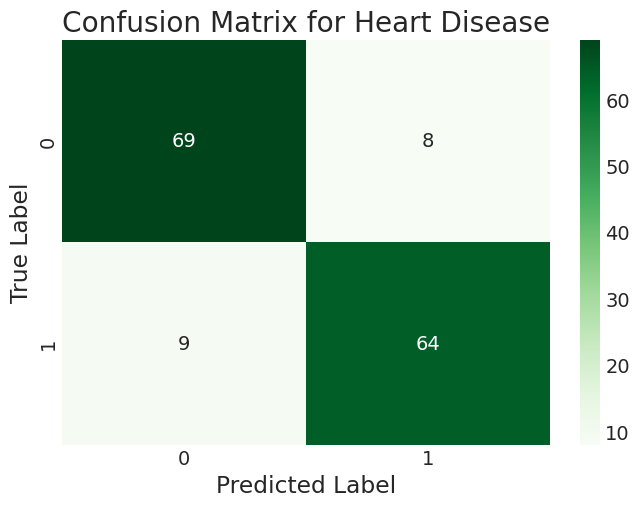

In [220]:
# Plotting the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap='Greens')

# Adding axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Heart Disease')

# Display the plot
plt.show()

### **Save Model**

In [221]:
import pickle

In [222]:
# Save the model to a file using pickle
with open('SVC_model.pkl', 'wb') as model_file:
    pickle.dump(SVCModel, model_file)

In [223]:
with open('SVC_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [224]:
preds = loaded_model.predict(X_test)
preds

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1])